In [ ]:
!wget https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv

--2021-05-28 09:17:39--  https://www.dropbox.com/s/18vhxydhoe3g84n/creditcard%202.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/18vhxydhoe3g84n/creditcard%202.csv [following]
--2021-05-28 09:17:40--  https://www.dropbox.com/s/raw/18vhxydhoe3g84n/creditcard%202.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb698190df309b333340815a5c0.dl.dropboxusercontent.com/cd/0/inline/BPUxxFijLslqMthIieM9oJywXNJOCeaehRMkGZeIzgtq7ueqtN73UmDZVTt6p1ZuBPbHJLzASfUpnoOHAIOSaBtNkmc6DvSUMNEDuuyTx1tiDFMHv7ecz1kC3CqTF1iNTa53MEjPPTkFua_PCsKGhVD0/file# [following]
--2021-05-28 09:17:40--  https://ucb698190df309b333340815a5c0.dl.dropboxusercontent.com/cd/0/inline/BPUxxFijLslqMthIieM9oJywXNJOCeaehRMkGZeIzgtq7ueqtN73UmDZVTt6p1ZuBPbHJLzA

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [ ]:
#ML LIBRARIES
%matplotlib inline 
#magic command  it sets the backend of matplotlib to the 'inline' backend
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [ ]:
creditcard = pd.read_csv('/content/creditcard.csv')

In [ ]:
creditcard.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
creditcard.shape

(284807, 31)

In [ ]:
creditcard.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

If creditcard[Class] = 0 Not a fraud transaction

If creditcard[Class] = 1 Fraud transaction



In [ ]:
creditcard[['Time','Amount','Class']].describe()
#Statistical information of the dataset

,Time,Amount,Class
count,284807.000000,284807.000000,284807.000000
mean,94813.859575,88.349619,0.001727
std,47488.145955,250.120109,0.041527
min,0.000000,0.000000,0.000000
25%,54201.500000,5.600000,0.000000
50%,84692.000000,22.000000,0.000000
75%,139320.500000,77.165000,0.000000
max,172792.000000,25691.160000,1.000000


In [ ]:
creditcard.isnull().any()
#if there is any null value then prediction will not so good

Time      False
V1        False
V2        False
V3        False
V4        False
V5        False
V6        False
V7        False
V8        False
V9        False
V10       False
V11       False
V12       False
V13       False
V14       False
V15       False
V16       False
V17       False
V18       False
V19       False
V20       False
V21       False
V22       False
V23       False
V24       False
V25       False
V26       False
V27       False
V28       False
Amount    False
Class     False
dtype: bool

**Percentage of total not fraud transaction**

In [ ]:
notfraud = creditcard['Class']
len(notfraud)

284807

In [ ]:
nfcount = 0
for i in range(len(notfraud)):
  if notfraud[i] == 0:
    nfcount = nfcount+1
nfcount

284315

In [ ]:
percentage_nf = (nfcount/len(notfraud))*100
print('Percentage of total not fraud transaction in datadset',percentage_nf)

Percentage of total not fraud transaction in datadset 99.82725143693798


**Percentage of total fraud transaction**

In [ ]:
fraud = creditcard['Class']
len(fraud)

284807

In [ ]:
fcount = 0
for i in range(len(fraud)):
  if fraud[i] == 1:
    fcount = fcount+1
fcount

492

In [ ]:
percentage_f = (fcount/len(fraud))*100
print('Percentage of total fraud transaction in datadset',percentage_f)

Percentage of total fraud transaction in datadset 0.1727485630620034


**Data Visualization**

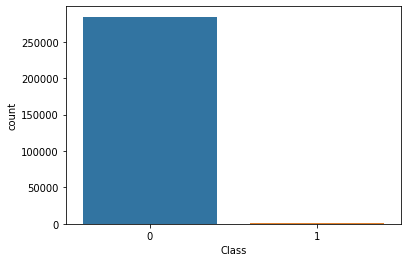

In [ ]:
sns.countplot(x = creditcard['Class'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


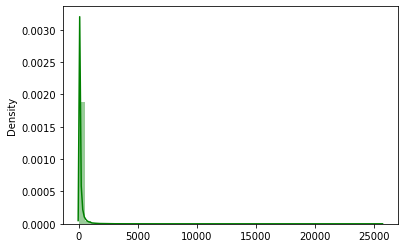

In [ ]:
sns.distplot(x = creditcard['Amount'],color='green')

**Outliers**

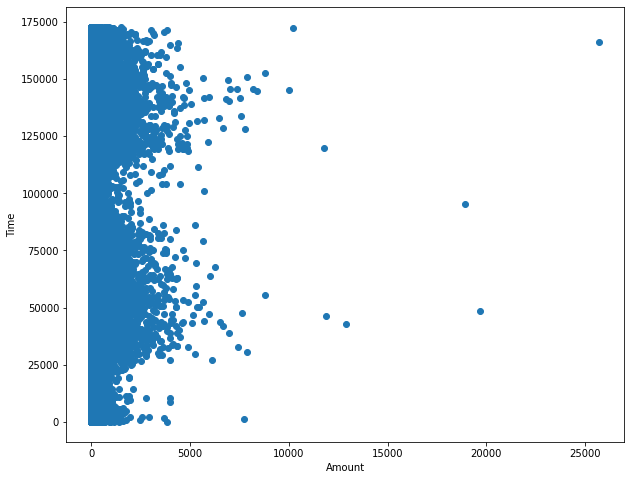

In [ ]:
fig, xy = plt.subplots(figsize=(10,8))
xy.scatter(creditcard['Amount'],creditcard['Time'])
xy.set_xlabel('Amount')
xy.set_ylabel('Time')
plt.show()

**Correlations**

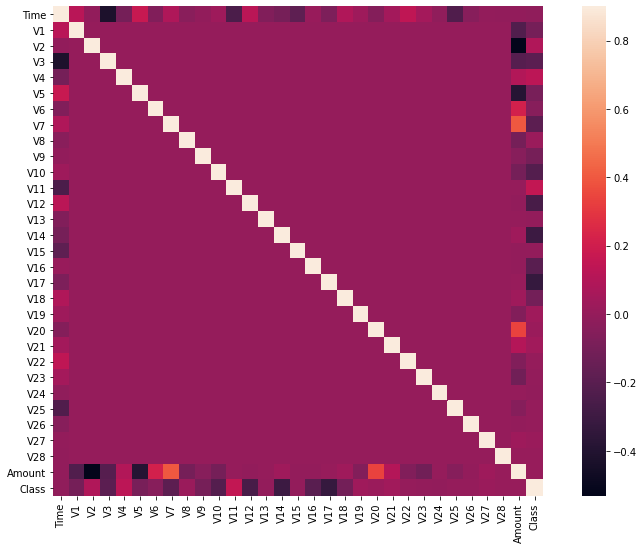

In [ ]:
corr = creditcard.corr()
fig = plt.figure(figsize = (14,9))
sns.heatmap(corr , vmax = .9, square = True)
plt.show()

**Logistic Regression**

In [ ]:
x = creditcard.drop(['Class'], axis = 1)
y = creditcard['Class']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)

In [ ]:
x_test.shape

(85443, 30)

In [ ]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [ ]:
accuracy = lr.score(x_test,y_test)
accuracy

0.9991222218320986

**Confusion matrix**

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[85272,    35],
       [   40,    96]])

**Accuracy calculation**

In [ ]:
print('Accuracy score of the Logistic Regression model is',accuracy*100,'%')

Accuracy score of the Logistic Regression model is 99.91222218320986 %
